## Load The Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Komal/Amazon_Final_Labeled_Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26818 entries, 0 to 26817
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_review  26780 non-null  object 
 1   emojis       26818 non-null  object 
 2   star_rating  26818 non-null  float64
 3   total_votes  26818 non-null  float64
 4   Labels       26818 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.0+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

full_review    0
emojis         0
star_rating    0
total_votes    0
Labels         0
dtype: int64

In [ ]:
df.dtypes

full_review     object
emojis          object
star_rating    float64
total_votes    float64
Labels          object
dtype: object

In [ ]:
class_counts = df['Labels'].value_counts()
print(class_counts)

Efficacy           13522
Satisfication       6475
Uncertain           5717
Dissatisfaction      619
Side Effect          447
Name: Labels, dtype: int64


In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Separate features and labels
features = df.drop(columns=['Labels'])
labels = df['Labels']

# Use RandomOverSampler to balance the classes
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
features_balanced, labels_balanced = oversampler.fit_resample(features, labels)

# Create the balanced dataframe
df = pd.DataFrame(features_balanced, columns=features.columns)
df['Labels'] = labels_balanced

In [ ]:
class_counts = df['Labels'].value_counts()
print(class_counts)

Efficacy           13522
Satisfication      13522
Side Effect        13522
Uncertain          13522
Dissatisfaction    13522
Name: Labels, dtype: int64


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
df

,full_review,emojis,star_rating,total_votes,Labels
0,best taste great absolutely love live without ...,😊,5.0,1.0,Efficacy
1,best flavor tried wicked fast delivery best fl...,😉,5.0,0.0,Efficacy
2,worth money needed fair price works great face...,👍,5.0,0.0,Efficacy
3,garbage fun use first hours peice fell really ...,😠,1.0,0.0,Satisfication
4,really works friends comment lose belly fast g...,😉,5.0,0.0,Efficacy
...,...,...,...,...,...
67605,color looked bit different however received ma...,😳,5.0,0.0,Uncertain
67606,five stars,😅😄,5.0,0.0,Uncertain
67607,small nothing small nothing make sense put mid...,👎,1.0,5.0,Uncertain
67608,five stars,👌👌,5.0,0.0,Uncertain


### Checking The Emojis Column Length

In [ ]:
import pandas as pd
import emoji


# Define a function to count the number of emojis in a string
def count_emojis(text):
    return len([c for c in text if c in emoji.EMOJI_DATA])

# Apply the function to each row of your dataframe
emoji_counts = df["emojis"].apply(lambda x: count_emojis(x))

# Calculate the minimum, maximum, and average number of emojis
min_emojis = emoji_counts.min()
max_emojis = emoji_counts.max()
avg_emojis = emoji_counts.mean()

# Print the results
print("The minimum number of emojis in a row is:", min_emojis)
print("The maximum number of emojis in a row is:", max_emojis)
print("The average number of emojis in a row is:", avg_emojis)

The minimum number of emojis in a row is: 1
The maximum number of emojis in a row is: 317
The average number of emojis in a row is: 1.7557757728146723


In [ ]:
# Get the emojis column
emojis_column = df['emojis']

# Function to extract unique emojis from the column
def extract_unique_emojis(emojis_column):
    unique_emojis = set()
    for emojis_str in emojis_column:
        emojis_list = emojis_str.split()
        for e in emojis_list:
            unique_emojis.add(emoji.demojize(e))
    return unique_emojis

# Find the unique emojis
unique_emojis = extract_unique_emojis(emojis_column)

# Print the number of unique emojis
print(f"Number of unique emojis: {len(unique_emojis)}")

Number of unique emojis: 3275


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.7 MB/s eta 0:00:00


In [ ]:
import torch

# Check if a GPU is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


# BERT Model

BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained
transformer-based deep neural network developed by Google. BERT is designed to
learn contextual relations between words in a sentence or text sequence, which makes it an excellent choice for various natural language processing tasks, including sentiment analysis and text classification.

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
import pandas as pd
import numpy as np

In [ ]:
df

,full_review,emojis,star_rating,total_votes,Labels
0,best taste great absolutely love live without ...,😊,5.0,1.0,Efficacy
1,best flavor tried wicked fast delivery best fl...,😉,5.0,0.0,Efficacy
2,worth money needed fair price works great face...,👍,5.0,0.0,Efficacy
3,garbage fun use first hours peice fell really ...,😠,1.0,0.0,Satisfication
4,really works friends comment lose belly fast g...,😉,5.0,0.0,Efficacy
...,...,...,...,...,...
67605,color looked bit different however received ma...,😳,5.0,0.0,Uncertain
67606,five stars,😅😄,5.0,0.0,Uncertain
67607,small nothing small nothing make sense put mid...,👎,1.0,5.0,Uncertain
67608,five stars,👌👌,5.0,0.0,Uncertain


## Encoding The Labels
The code imports the LabelEncoder class from the scikit-learn (sklearn) library's preprocessing module. LabelEncoder is a utility class that can be used to convert categorical data into numerical data.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the categorical labels to integer labels
df['Labels'] = label_encoder.fit_transform(df['Labels'])


In [ ]:
print(label_encoder.classes_)

# Print the numerical mapping of each category
for i, category in enumerate(label_encoder.classes_):
    print(category, ":", i)


['Dissatisfaction' 'Efficacy' 'Satisfication' 'Side Effect' 'Uncertain']
Dissatisfaction : 0
Efficacy : 1
Satisfication : 2
Side Effect : 3
Uncertain : 4


In [ ]:
# set warning to off
import logging
logging.getLogger("transformers.tokenization_utils_base").setLevel(logging.ERROR)

In [ ]:
import torch.nn as nn
# Define the number of unique emojis
num_emojis = len(unique_emojis)

# Define the size of the emoji embeddings
embedding_dim = 768  # You can choose any suitable dimension

# Create an index-to-emoji mapping
index_to_emoji = {i: emoji for i, emoji in enumerate(unique_emojis)}

# Create an emoji-to-index mapping
emoji_to_index = {emoji: i for i, emoji in index_to_emoji.items()}

# Create an instance of nn.Embedding to hold the emoji embeddings
emoji_embedding = nn.Embedding(num_emojis, embedding_dim)

# Initialize the embedding weights with random values (you can also load pre-trained embeddings)
nn.init.normal_(emoji_embedding.weight, mean=0, std=0.01)



Parameter containing:
tensor([[-0.0064, -0.0007,  0.0170,  ...,  0.0113, -0.0060, -0.0105],
        [-0.0008, -0.0008, -0.0164,  ..., -0.0156,  0.0107, -0.0131],
        [ 0.0045, -0.0112, -0.0091,  ..., -0.0056, -0.0024, -0.0117],
        ...,
        [ 0.0059,  0.0082,  0.0162,  ...,  0.0024,  0.0049,  0.0096],
        [-0.0027,  0.0176, -0.0069,  ...,  0.0027,  0.0053, -0.0210],
        [ 0.0218, -0.0037, -0.0079,  ..., -0.0026,  0.0029,  0.0002]],
       requires_grad=True)

In [ ]:
emoji_embedding

Embedding(3275, 768)

## Dataset Class
The provided code defines a PyTorch dataset class called AmazonDataset for sentiment analysis of Amazon reviews. It takes in a Pandas dataframe, a tokenizer, and a maximum sequence length as inputs. The `__init__` method initializes the class with the tokenizer, dataframe, and maximum sequence length, as well as the different columns of the dataframe that will be used for the task. The `__len__` method returns the length of the dataset, and the `__getitem__` method preprocesses the review text and emojis by joining and tokenizing them using the provided tokenizer. It then encodes the text and emojis using the tokenizer's `encode_plus` method, adding special tokens and padding/truncating to the specified maximum length. It creates tensors for the emojis, star rating, and total votes, and returns a dictionary containing the encoded input IDs, attention masks, token type IDs, emojis, star rating, total votes, and label. This class is designed to be used in a PyTorch DataLoader to efficiently process and feed the data to a neural network for training or inference.


In [ ]:

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import os
import re
import string
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
import torch
from torch.utils.data import Dataset
import emoji

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
class AmazonDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len, num_emojis):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.full_review = self.data['full_review']
        self.emojis = self.data['emojis']
        self.star_rating = self.data['star_rating']
        self.total_votes = self.data['total_votes']
        self.labels = self.data['Labels']
        self.max_len = max_len
        self.num_emojis = num_emojis

        # Create a mapping of unique emojis to their corresponding indices
        all_emojis = " ".join(self.emojis)
        unique_emojis = set(all_emojis.split())
        self.emoji_to_index = {emoji: i for i, emoji in enumerate(unique_emojis)}

    def preprocess_text(self, text):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = text.translate(str.maketrans('', '', string.punctuation))
        words = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        processed_text = ' '.join(words)
        return processed_text

    def convert_emojis_to_embeddings(self, emoji_list):
        # Convert the list of emojis to embeddings
        emoji_ids = [self.emoji_to_index.get(emoji, 0) for emoji in emoji_list]
        padded_emoji_ids = emoji_ids + [0] * (self.max_len - len(emoji_ids))  # Pad to max_len
        return torch.tensor(padded_emoji_ids, dtype=torch.long)

    def __len__(self):
          return len(self.labels)

    def __getitem__(self, index):
        review = str(self.full_review[index])  # Get the review text from self.full_review
        review = " ".join(review.split())
        review = self.preprocess_text(review)  # Apply the preprocessing

        emoji_list = [emoji.demojize(e) for e in self.emojis[index].split()]
        emoji_text = " ".join(emoji_list)

        encoding = self.tokenizer.encode_plus(
            review,
            emoji_text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',  # Pad to max_len
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        emojis = self.convert_emojis_to_embeddings(emoji_list)
        star_rating = torch.tensor(self.star_rating[index], dtype=torch.float32)  # Changed to float32
        total_votes = torch.tensor(self.total_votes[index], dtype=torch.float32)  # Changed to float32

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
            'emojis': emojis,
            'star_rating': star_rating,
            'total_votes': total_votes,
            'label': torch.tensor(self.labels[index], dtype=torch.long)
        }


## Load The Pre-trained Model & Tokenizer
This code initializes a **`BERT (Bidirectional Encoder Representations from Transformers)`** tokenizer and model from the pre-trained BERT-base-uncased checkpoint using the **from_pretrained()** method provided by the **transformers** library.

In [ ]:
# Initialize the tokenizer and BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')


## Model Class
This code defines a PyTorch module for a sentiment classification task on Amazon product reviews using a pre-trained BERT model. The **AmazonBERTClassifier** class inherits from **nn.Module** and takes in a pre-trained BERT model, the number of emojis in the dataset, the hidden size of the model, and the number of output classes as input.

The forward method of the class first passes the input through the BERT model to get the sequence output. It then applies self-attention to the sequence output, and calculates the mean-pooled output of the self-attended output. The mean-pooled output is then concatenated with the number of emojis, star rating, and total votes tensors to form the pooled output. Finally, the pooled output is passed through a linear layer to get the logits for the classification task.



In [ ]:
import torch
import torch.nn as nn


class AmazonBERTClassifier(nn.Module):
    def __init__(self, bert_model, num_emojis, num_classes, num_heads):
        super(AmazonBERTClassifier, self).__init__()

        self.bert_model = bert_model
        self.num_emojis = num_emojis
        self.hidden_size = bert_model.config.hidden_size
        self.num_classes = num_classes
        self.num_heads = num_heads
        self.emoji_embedding_layer = nn.Embedding(num_emojis, self.hidden_size)
        self.self_attention = nn.MultiheadAttention(self.hidden_size, num_heads=num_heads)
        self.emoji_attention = nn.MultiheadAttention(self.hidden_size, num_heads=num_heads)
        self.attention_fusion = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.classification_head = nn.Linear(self.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask, token_type_ids, emojis, star_rating, total_votes):
        bert_outputs = self.bert_model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        sequence_output = bert_outputs.last_hidden_state

        # Apply self-attention to the sequence_output
        self_attended_output, _ = self.self_attention(sequence_output.transpose(0, 1),
                                                      sequence_output.transpose(0, 1),
                                                      sequence_output.transpose(0, 1))

        # Transpose self-attended output to match the desired shape
        self_attended_output = self_attended_output.transpose(0, 1)

        # Apply emoji-aware attention to sequence_output using emoji embeddings
        batch_size, sequence_length = sequence_output.shape[:2]  # Get the batch size and sequence length
        emojis_expanded = self.emoji_embedding_layer(emojis)  # Use the emoji_embedding_layer to get emoji embeddings

        # Perform element-wise multiplication between emoji_aware_output and sequence_output
        emoji_aware_output = emojis_expanded * sequence_output.unsqueeze(1)

        # Average pooling along the second dimension to match the shape of self_attended_output
        emoji_aware_output = torch.mean(emoji_aware_output, dim=1)

        #print("Shape of emoji_aware_output:", emoji_aware_output.shape)
        #print("Shape of self_attended_output:", self_attended_output.shape)

        # Attention-based fusion using a linear layer
        fusion_input = torch.cat([self_attended_output, emoji_aware_output], dim=-1)
        fusion_output = self.attention_fusion(fusion_input)

        # Perform sentiment analysis
        pooled_output = torch.mean(fusion_output, dim=1)
        logits = self.classification_head(pooled_output)

        return logits

## Train Function
This is a training function for a given model, **train_loader**, and **optimizer** using a specified **loss_fn**. The function trains the model for a specified number of epochs and computes training losses and accuracies.

During each epoch, the function iterates over the training data in batches of size **batch_size**. It then performs forward propagation, computes the loss and backpropagates to update the model parameters using the optimizer. The function also computes and prints the training loss after each batch, as well as the overall training loss and accuracy after each epoch.

The function returns two lists: **train_losses** containing the training losses for each epoch, and **train_accuracies** containing the training accuracies for each epoch.




In [ ]:
def train(model, train_loader, val_loader, loss_fn, optimizer, num_epochs, batch_size):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    val_f1_scores = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        model.train()
        train_running_loss = 0.0
        total_predictions = 0
        correct_predictions = 0

        for i, data in enumerate(train_loader, 0):
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            token_type_ids = data['token_type_ids'].to(device)
            emojis = data['emojis'].to(device)
            star_rating = data['star_rating'].to(device).to(torch.float)
            total_votes = data['total_votes'].to(device).to(torch.float)
            label = data['label'].to(device)

            optimizer.zero_grad()

            outputs = model(input_ids, attention_mask, token_type_ids, emojis, star_rating, total_votes)
            loss = loss_fn(outputs, label)

            loss.backward()
            optimizer.step()

            train_running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_predictions += label.size(0)
            correct_predictions += (predicted == label).sum().item()

            if (i + 1) % batch_size == 0 or (i + 1) == len(train_loader):
                print(f'Epoch {(epoch + 1):2d}/{num_epochs}, Batch {(i + 1):5d}/{len(train_loader)}, Loss: {loss.item():.4f}')

        train_losses.append(train_running_loss / len(train_loader))
        train_accuracy = 100 * (correct_predictions / total_predictions)
        train_accuracies.append(train_accuracy)

        # Validation phase
        val_loss, val_accuracy, val_f1, cm = evaluate(model, val_loader, loss_fn, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_f1_scores.append(val_f1)

        print(f'Train Loss: {train_losses[-1]:.4f}')
        print(f'Train Accuracy: {train_accuracy:.2f}%')
        print(f'Validation Loss: {val_losses[-1]:.4f}')
        print(f'Validation Accuracy: {val_accuracies[-1]:.2f}%')
        print(f'Validation F1 Score: {val_f1_scores[-1]:.4f}')

    return train_losses, train_accuracies, val_losses, val_accuracies, val_f1_scores, cm

## Validation Function
The function **validate** takes in a trained model, validation data loader, loss function, and device. It then runs a loop over the number of epochs specified and evaluates the model on the validation data for each epoch.

During each epoch, the model is put into evaluation mode by calling **model.eval()**. Then, a loop is run over the validation data loader. Inside the loop, the inputs and labels are retrieved from the data dictionary and moved to the specified device. The model is then called on the inputs to get the predicted outputs. The loss is calculated using the specified loss function and added to a running total loss.

The predicted outputs are then compared to the labels to calculate the number of correct predictions, which is added to a running total. The total number of labels is also tracked. The predicted outputs and labels are appended to separate lists to be used later for calculating the confusion matrix and F1 score.

After the loop over the validation data loader is finished, the average validation loss, accuracy, and F1 score are calculated. The confusion matrix is also calculated using the predicted outputs and labels. These metrics are printed to the console.

Finally, the validation loss, accuracy, F1 score, and confusion matrix are appended to their respective lists and returned at the end of the function.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Function for evaluating the model
def evaluate(model, data_loader, loss_fn, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    running_total = 0
    running_preds = []
    running_labels = []

    with torch.no_grad():
        for data in data_loader:
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            token_type_ids = data['token_type_ids'].to(device)
            emojis = data['emojis'].to(device)
            star_rating = data['star_rating'].to(device)
            total_votes = data['total_votes'].to(device)
            label = data['label'].to(device)

            outputs = model(input_ids, attention_mask, token_type_ids, emojis, star_rating, total_votes)
            loss = loss_fn(outputs, label)
            running_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == label.data)
            running_total += label.size(0)

            running_preds.extend(preds.tolist())
            running_labels.extend(label.tolist())

    loss = running_loss / len(data_loader)
    accuracy = running_corrects.double() / running_total

    print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(running_labels, running_preds))
    print('Confusion Matrix:')
    cm = confusion_matrix(running_labels, running_preds)
    print(cm)

    # Compute F1 score with class weights
    f1 = f1_score(running_labels, running_preds, average='weighted')

    return loss, accuracy, f1, confusion_matrix(running_labels, running_preds)



## Test Function
The given code defines a function named test that takes a **model**, **test_loader**, and **loss_fn** as input. This function evaluates the **model** on the given **test_loader** using **loss_fn** to calculate the loss.

During the evaluation, it calculates the **test_running_loss**, **num_correct**, and **num_total** values for each batch of data in the test_loader. It also keeps track of **y_true** and **y_pred** for the entire **test_loader**.

After the evaluation, it calculates the **avg_test_loss** and **avg_test_acc** for the entire **test_loader**. Then it prints out the Test Results, Classification Report, and Confusion Matrix.

Finally, it plots the confusion matrix and returns the **avg_test_loss** and **avg_test_acc** values.



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def test(model, test_loader, loss_fn):
    model.eval()
    test_running_loss = 0.0
    num_correct = 0
    num_total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for i, data in enumerate(test_loader, 0):
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            token_type_ids = data['token_type_ids'].to(device)
            emojis = data['emojis'].to(device)
            star_rating = data['star_rating'].to(device)
            total_votes = data['total_votes'].to(device)
            label = data['label'].to(device)


            outputs = model(input_ids, attention_mask, token_type_ids, emojis, star_rating, total_votes)
            loss = loss_fn(outputs, label)

            test_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)

            num_correct += (predicted == label).sum().item()
            num_total += len(label)

            y_true += label.cpu().tolist()
            y_pred += predicted.cpu().tolist()

    avg_test_loss = test_running_loss / len(test_loader)
    avg_test_acc = num_correct / num_total

    print('Test Results:')
    print(f'Average loss: {avg_test_loss:.4f}')
    print(f'Accuracy: {avg_test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    print('Confusion Matrix:')
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # plot confusion matrix
    LABELS = ['Dissatisfaction', 'Efficacy', 'Satisfaction', 'Side Effect', 'Uncertain']
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.xticks(ticks=[0, 1, 2, 3, 4], labels=LABELS, rotation=45)
    plt.yticks(ticks=[0, 1, 2, 3, 4], labels=LABELS, )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Test Confusion Matrix')
    # display values in each cell of the confusion matrix
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.annotate(str(cm[i, j]), xy=(j, i),
                         horizontalalignment='center',
                         verticalalignment='center',
                         color='white' if cm[i, j] > thresh else 'black')
    plt.show()

    return avg_test_loss, avg_test_acc


## Initializing Hyperparameters and Loading Data for Sentiment Analysis Model
The given code initializes hyperparameters and creates datasets and dataloaders for training, validation, and testing. It defines the loss function as **nn.CrossEntropyLoss()**, moves the model and loss function to the device, and initializes the sentiment classifier model called **AmazonBERTClassifier**.

The **AmazonBERTClassifier** takes in the pre-trained bert_model, the number of emojis, the hidden size, and the number of classes. The model is then moved to the device using** .to(device)**. The optimizer is defined as **optim.AdamW(model.parameters()**, **lr=LEARNING_RATE**).





In [ ]:
# Get the unique emojis from the entire dataset
all_emojis = " ".join(df['emojis'])
unique_emojis = set(all_emojis.split())

# Create a mapping of unique emojis to their corresponding indices
emoji_to_index = {emoji: i for i, emoji in enumerate(unique_emojis)}

# Update the num_emojis with the actual number of unique emojis
num_emojis = len(unique_emojis)

In [ ]:


import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader

# Set the hyperparameters
MAX_LEN = 250
BATCH_SIZE = 36
NUM_EMOJIS = 3275
NUM_CLASSES = 5
num_heads = 2
LEARNING_RATE = 2e-5
NUM_EPOCHS = 5

## Data Train Test Split
In this code, the train_test_split function from the sklearn.model_selection module is used to split a pandas DataFrame df into three sets: train_df, val_df, and test_df. The test_df is created with a size of 0.15, which means that 15% of the original data will be used for testing. Then, the train_val_df is split into train_df and val_df with a validation size of 0.15, which means that 15% of the data from train_val_df will be used for validation. The random_state parameter is set to 42 to ensure that the same split is obtained each time the code is run.

In [ ]:
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR


# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Split the test set further into validation and test sets
valid_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Reset the indices for all DataFrames
train_df.reset_index(drop=True, inplace=True)
valid_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Initialize the custom datasets
train_dataset = AmazonDataset(train_df, tokenizer, MAX_LEN, NUM_EMOJIS)
valid_dataset = AmazonDataset(valid_df, tokenizer, MAX_LEN, NUM_EMOJIS)
test_dataset = AmazonDataset(test_df, tokenizer, MAX_LEN, NUM_EMOJIS)

# Create the data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Initialize the sentiment classifier model
model = AmazonBERTClassifier(bert_model, NUM_EMOJIS, num_classes=NUM_CLASSES, num_heads=num_heads).to(device)

# Define the loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)



## Training the Model

In [ ]:
import torch.nn.functional as F

# Train the model
train_losses, train_accuracies, val_losses, val_accuracies, val_f1_scores, confusion_matrix_last_epoch = train(model, train_loader, valid_loader, loss_fn, optimizer, NUM_EPOCHS, BATCH_SIZE)

Epoch 1/5
----------
Epoch  1/5, Batch    36/1503, Loss: 0.9756
Epoch  1/5, Batch    72/1503, Loss: 0.6595
Epoch  1/5, Batch   108/1503, Loss: 0.8090
Epoch  1/5, Batch   144/1503, Loss: 0.5858
Epoch  1/5, Batch   180/1503, Loss: 0.6409
Epoch  1/5, Batch   216/1503, Loss: 0.4725
Epoch  1/5, Batch   252/1503, Loss: 0.2995
Epoch  1/5, Batch   288/1503, Loss: 0.2362
Epoch  1/5, Batch   324/1503, Loss: 0.2985
Epoch  1/5, Batch   360/1503, Loss: 0.1453
Epoch  1/5, Batch   396/1503, Loss: 0.2710
Epoch  1/5, Batch   432/1503, Loss: 0.2475
Epoch  1/5, Batch   468/1503, Loss: 0.2283
Epoch  1/5, Batch   504/1503, Loss: 0.1955
Epoch  1/5, Batch   540/1503, Loss: 0.4170
Epoch  1/5, Batch   576/1503, Loss: 0.1906
Epoch  1/5, Batch   612/1503, Loss: 0.4045
Epoch  1/5, Batch   648/1503, Loss: 0.0900
Epoch  1/5, Batch   684/1503, Loss: 0.2599
Epoch  1/5, Batch   720/1503, Loss: 0.0903
Epoch  1/5, Batch   756/1503, Loss: 0.3718
Epoch  1/5, Batch   792/1503, Loss: 0.1697
Epoch  1/5, Batch   828/1503, Los

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=d14c5b0d6a26b84b180c73d46d1ab7643c3b2bee090dc68226318e7413f9fb5f
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torch
from torchviz import make_dot

# Get a sample batch from the train loader (or any other loader you want to visualize)
sample_batch = next(iter(train_loader))

# Unpack the sample batch
input_ids = sample_batch['input_ids'].to(device)
attention_mask = sample_batch['attention_mask'].to(device)
token_type_ids = sample_batch['token_type_ids'].to(device)
emojis = sample_batch['emojis'].to(device)
star_rating = sample_batch['star_rating'].to(device)
total_votes = sample_batch['total_votes'].to(device)

# Create a computation graph of the model
dot = make_dot(
    model(input_ids, attention_mask, token_type_ids, emojis, star_rating, total_votes).to(device),
    params=dict(model.named_parameters())
)

# Save the graph as a PDF or display it
dot.format = 'png'  # You can change this to 'png', 'svg', etc.
dot.render("./model_architecture_actual")

OutOfMemoryError: ignored

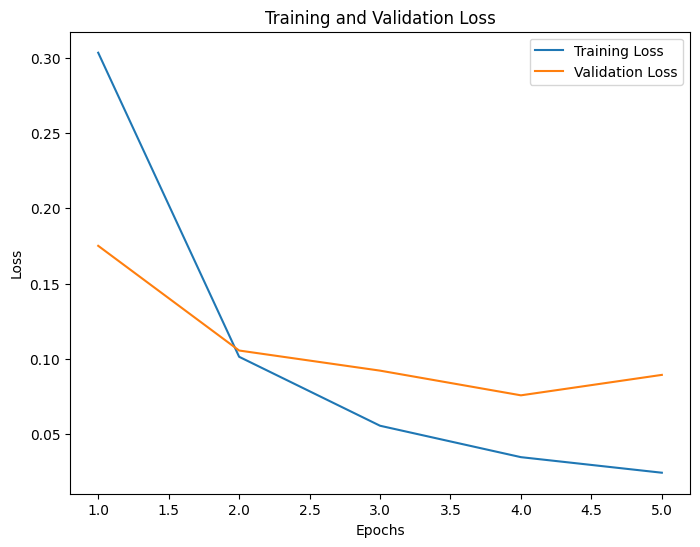

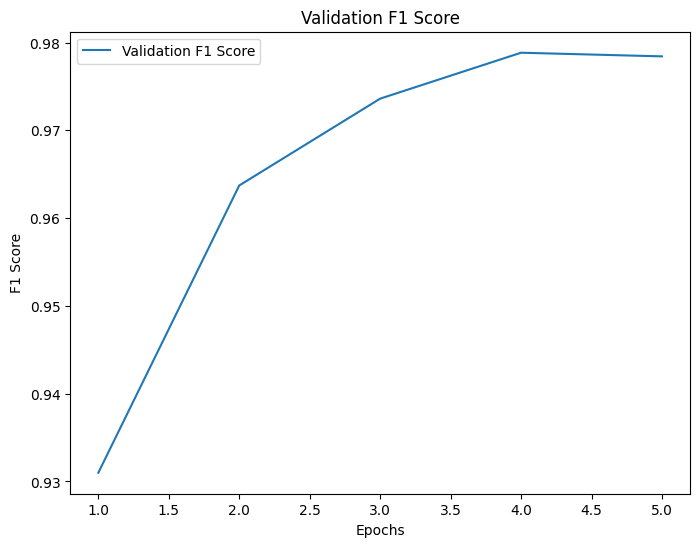

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_curves(train_losses, val_losses, num_epochs):
    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()



def plot_f1_curve(val_f1_scores, num_epochs):
    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, val_f1_scores, label='Validation F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.title('Validation F1 Score')
    plt.legend()
    plt.show()


# Plot loss curves
plot_loss_curves(train_losses, val_losses, NUM_EPOCHS)


# Plot validation F1 score curve
plot_f1_curve(val_f1_scores, NUM_EPOCHS)


## Validating the Model

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = evaluate(model, valid_loader, loss_fn, device)

In [ ]:
val_accs_list = [acc.tolist() for acc in val_accuracies]
val_accs = [acc * 100 for acc in val_accs_list]


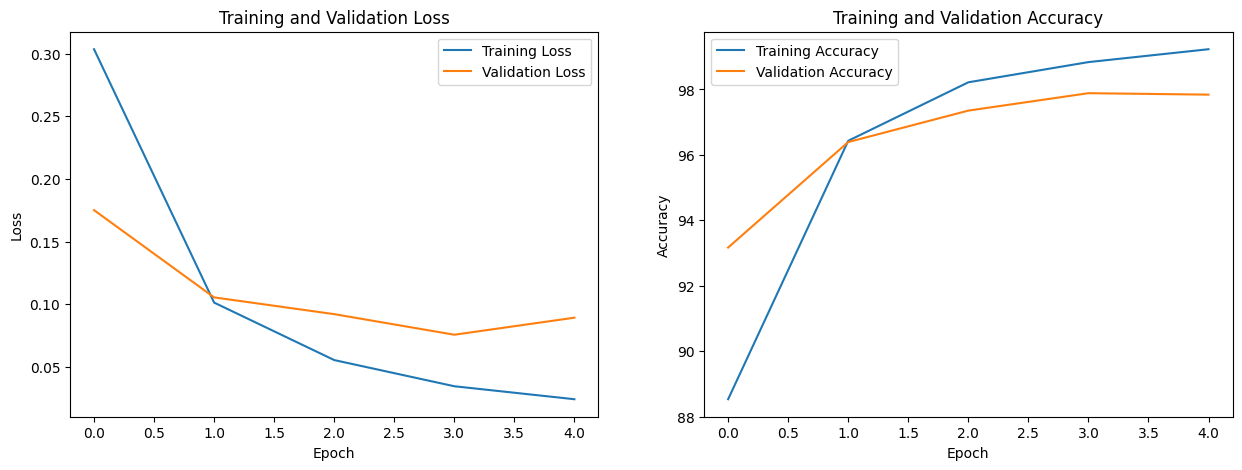

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training and validation losses
axs[0].plot(train_losses, label='Training Loss')
axs[0].plot(val_losses, label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].legend()

# Plot the training and validation accuracies
axs[1].plot(train_accuracies, label='Training Accuracy')
axs[1].plot(val_accs, label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].legend()


# Show the combined plot
plt.show()


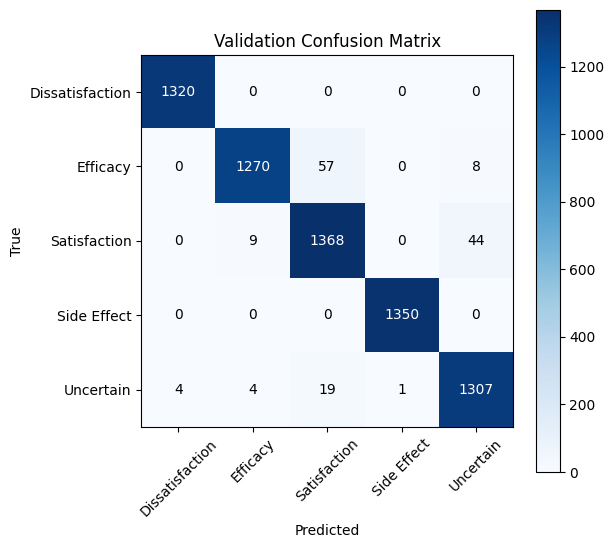

In [ ]:
# define the labels
LABELS = ['Dissatisfaction', 'Efficacy', 'Satisfaction', 'Side Effect', 'Uncertain']

# plot confusion matrix for last epoch
plt.figure(figsize=(6, 6))
plt.imshow(confusion_matrix_last_epoch, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=LABELS, rotation=45)
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=LABELS, )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Validation Confusion Matrix')

# display values in each cell of the confusion matrix
thresh = confusion_matrix_last_epoch.max() / 2.
for i in range(confusion_matrix_last_epoch.shape[0]):
    for j in range(confusion_matrix_last_epoch.shape[1]):
        plt.annotate(str(confusion_matrix_last_epoch[i, j]), xy=(j, i),
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='white' if confusion_matrix_last_epoch[i, j] > thresh else 'black')
plt.show()


## Testing the Model

In [ ]:
import torch.nn.functional as F


# Evaluate the model on the test set
test_loss, test_accuracy = test(model, test_loader, loss_fn, device)

NameError: ignored

## Saving the Model

In [ ]:
# Save the trained model
torch.save(model.state_dict(), '/content/drive/MyDrive/full_bert_multifeatue_model.pt')

In [ ]:
model = torch.load('model.pt')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (The code for train, evaluate, and test functions as provided in the question)

def plot_train_results(train_losses, train_accuracies, num_epochs):
    # Plot training loss and accuracy
    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_test_results(cm):
    LABELS = ['Dissatisfaction', 'Efficacy', 'Satisfaction', 'Side Effect', 'Uncertain']
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.xticks(ticks=np.arange(len(LABELS)), labels=LABELS, rotation=45)
    plt.yticks(ticks=np.arange(len(LABELS)), labels=LABELS)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Test Confusion Matrix')

    # Display values in each cell of the confusion matrix
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.annotate(str(cm[i, j]), xy=(j, i),
                         horizontalalignment='center',
                         verticalalignment='center',
                         color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.show()

plot_train_results(train_losses, train_accuracies, num_epochs)

plot_test_results(cm)
